In [57]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import sqlite3

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>COVID - Coronavirus Statistics - Worldometer</title>\n    <meta name="description" content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates.">\n\n\n    \n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n\t<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">\n\t<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">\n\t<li
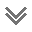

In [2]:
url ="https://www.worldometers.info/coronavirus/"
requests_data = requests.get(url).content
requests_data


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon
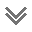

In [4]:
# soup the requested data
soup = BeautifulSoup(requests_data, "html.parser")
soup

In [14]:
table_head = soup.find("thead").find_all("th")
table_head

[<th width="1%">#</th>,
 <th width="100">Country,<br>Other</br></th>,
 <th width="20">Total<br>Cases</br></th>,
 <th width="30">New<br>Cases</br></th>,
 <th width="30">Total<br>Deaths</br></th>,
 <th width="30">New<br>Deaths</br></th>,
 <th width="30">Total<br>Recovered</br></th>,
 <th width="30">New<br>Recovered</br></th>,
 <th width="30">Active<br>Cases</br></th>,
 <th width="30">Serious,<br>Critical</br></th>,
 <th width="30">Tot Cases/<br/>1M pop</th>,
 <th width="30">Deaths/<br/>1M pop</th>,
 <th width="30">Total<br/>Tests</th>,
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>,
 <th width="30">Population</th>,
 <th style="display:none" width="30">Continent</th>,
 <th width="30">1 Case<br/>every X ppl</th>,
 <th width="30">1 Death<br/>every X ppl</th>,
 <th width="30">1 Test<br/>every X ppl</th>,
 <th width="30">New Cases/1M pop</th>,
 <th width="30">New Deaths/1M pop</th>,
 <th width="30">Active Cases/1M pop</th>]

In [15]:
table_column = [table_head[i].text for i in range(1,len(table_head))]
table_column

['Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [24]:
table_body = soup.find("tbody").find_all("tr")
table_body

[<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>North America</nobr>
 </td>
 <td>131,614,510</td>
 <td></td>
 <td>1,692,258</td>
 <td></td>
 <td>127,150,727</td>
 <td>+665</td>
 <td>2,771,525</td>
 <td>6,699</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="North America" style="display:none;">North America</td>
 <!-- 1 Case every X -->
 <td>
 </td>
 <!-- 1 Death every X -->
 <td></td>
 <!-- 1 test every X -->
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="Asia" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>Asia</nobr>
 </td>
 <td>221,467,169</td>
 <td></td>
 <td>1,553,255</td>
 <td></td>
 <td>205,659,245</td>
 <td>+306</td>
 <td>14,254,669</td>
 <td>14,733</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="Asia" style="display:none;">Asia</

In [49]:
complete_data = []
for tr in table_body[8:]:
    data = tr.find_all("td")
    td_data = [td.text for td in data[1:]] 
    complete_data.append(td_data)

In [52]:
df = pd.DataFrame(complete_data, columns=table_column)

In [53]:
df

Country,Other   TotalCases NewCases  \
0               USA  111,560,998            
1             India   45,030,332            
2            France   40,138,560            
3           Germany   38,822,474            
4            Brazil   38,452,504            
..              ...          ...      ...   
226         Tokelau           80            
227    Vatican City           29            
228  Western Sahara           10            
229      MS Zaandam            9            
230           China      503,302            

                                   TotalDeaths NewDeaths TotalRecovered  \
0    1,216,375                                              109,323,566   
1      533,496                                                      N/A   
2      167,642                                               39,970,918   
3      182,649                                               38,240,600   
4      709,963                                               36,249,161   
..                                         ...       ...            ...   
226                                                                       
227                                                                  29   
228          1                                                        9   
229          2                                                        7   
230      5,272                                                  379,053   

    NewRecovered ActiveCases Serious,Critical Tot Cases/1M pop  ...  \
0                  1,021,057            1,544          333,212  ...   
1            N/A         N/A              N/A           32,013  ...   
2                          0                           612,013  ...   
3                    399,225              N/A          462,814  ...   
4                  1,493,380              N/A          178,555  ...   
..           ...         ...              ...              ...  ...   
226                       80                            58,055  ...   
227                        0                            36,295  ...   
228                        0                                16  ...   
229                        0                                    ...   
230                  118,977              N/A              347  ...   

        TotalTests Tests/\n1M pop\n  \
0    1,186,765,074        3,544,643   
1      935,879,495          665,334   
2      271,490,188        4,139,547   
3      122,332,384        1,458,359   
4       63,776,166          296,146   
..             ...              ...   
226                                   
227                                   
228                                   
229                                   
230    160,000,000          110,461   

                                        Population          Continent  \
0                                     334,805,269       North America   
1                                   1,406,631,776                Asia   
2                                      65,584,518              Europe   
3                                      83,883,596              Europe   
4                                     215,353,593       South America   
..                                             ...                ...   
226                                         1,378   Australia/Oceania   
227                                           799              Europe   
228                                       626,161              Africa   
229                                                                     
230  1,448,471,400                                               Asia   

    1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop  \
0                   3                275                 0                    
1                  31              2,637                 2                    
2                   2                391                 0                    
3                   2                459         

In [56]:
df.to_csv("corona_data_scraping.csv", index=False)

# storing in DataBase

In [60]:
conn = sqlite3.Connection("coronaData.db")

In [61]:
cursor = conn.cursor()

In [68]:
# query to create table
query ="""
CREATE table coronadata
(
  Country varchar(500),
  TotalCases varchar(500),
  NewCases varchar(500),
  TotalDeaths varchar(500),
  NewDeaths varchar(500),
 TotalRecovered varchar(500),
 NewRecovered varchar(500),
 ActiveCases varchar(500),
 SeriousCritical varchar(500),
 TotalCasesPOp varchar(500),
 Deaths varchar(500),
 TotalTests varchar(500),
 Tests varchar(500),
 Population varchar(500),
 Continent varchar(500),
 Caseevery varchar(500),
 Deathevery varchar(500),
 Testevery varchar(500),
 NewCasesPOP varchar(500),
 New Deaths varchar(500),
 ActiveCasesPOP varchar(500) 
)
"""

In [69]:
cursor.execute(query)

In [92]:
# query to insert data
data_to_be_inserted = df.to_records(index=False)
query = """
INSERT into coronadata
(
 Country,
  TotalCases,
  NewCases,
  TotalDeaths,
  NewDeaths,
 TotalRecovered ,
 NewRecovered,
 ActiveCases,
 SeriousCritical,
 TotalCasesPOp,
 Deaths,
 TotalTests,
 Tests,
 Population,
 Continent,
 Caseevery,
 Deathevery,
 Testevery ,
 NewCasesPOP ,
 NewDeaths,
 ActiveCasesPOP
)
values(
?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
)
"""

In [93]:
cursor.executemany(query, data_to_be_inserted)

In [95]:
# to read data from database
cursor.execute("SELECT * from coronadata").fetchall()

[('USA',
  '111,560,998',
  '',
  '1,216,375                                ',
  '',
  '109,323,566',
  '',
  '1,021,057',
  '1,544',
  '333,212',
  '3,633',
  '1,186,765,074',
  '3,544,643',
  '334,805,269 ',
  'North America',
  '3',
  '275',
  '0',
  '',
  None,
  '3,050'),
 ('India',
  '45,030,332',
  '',
  '533,496                                ',
  '',
  'N/A',
  'N/A',
  'N/A',
  'N/A',
  '32,013',
  '379',
  '935,879,495',
  '665,334',
  '1,406,631,776 ',
  'Asia',
  '31',
  '2,637',
  '2',
  '',
  None,
  '0.8'),
 ('France',
  '40,138,560',
  '',
  '167,642                                ',
  '',
  '39,970,918',
  '',
  '0',
  '',
  '612,013',
  '2,556',
  '271,490,188',
  '4,139,547',
  '65,584,518 ',
  'Europe',
  '2',
  '391',
  '0',
  '',
  None,
  ''),
 ('Germany',
  '38,822,474',
  '',
  '182,649                                ',
  '',
  '38,240,600',
  '',
  '399,225',
  'N/A',
  '462,814',
  '2,177',
  '122,332,384',
  '1,458,359',
  '83,883,596 ',
  'Europe',
  '2',
